# 3. Clustering

In [1]:
# INSERISCI IN IMPORT

# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To visualize the data
import matplotlib.pyplot as plt

# Generic libraries
import seaborn as sns
import pandas as pd
import numpy as np

# Regression models
import sklearn
import scipy
from scipy.stats import *
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV #split the data into training and test
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.metrics import r2_score, mean_squared_error

# 5-folds crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, classification_report
from sklearn.pipeline import Pipeline

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
# INSERISCI IN IMPORT

# Libraries specific for clustering
import matplotlib.colors as mcolors
import random
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [3]:
# QUESTO VA TOLTO

training_set = pd.read_csv("NOTEBOOK/training_set_complete.csv")
test_set = pd.read_csv("NOTEBOOK/test_set_complete.csv")
#training_set = training_set.drop(columns=['Unnamed: 0'])
#test_set = test_set.drop(columns=['Unnamed: 0'])
training_set['Revenue'] = training_set['Revenue'].astype(int)
test_set['Revenue'] = test_set['Revenue'].astype(int)
#training_set['Revenue'].value_counts()
#test_set['Revenue'].value_counts()
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
#training_set[categorical_features] = training_set[categorical_features].astype('category')
#test_set[categorical_features] = test_set[categorical_features].astype('category')

In [5]:
# QUESTO VA INTEGRATO

X_train_full = training_set.drop(columns=['Revenue'])
X_test_full = test_set.drop(columns=['Revenue'])
y_train = training_set['Revenue']
y_test = test_set['Revenue']

In [7]:
# ADATTARE

# FACCIAMO QUESTO STEP PER EVITARE PROBLEMI DI CONVERGENZA NEL MODELLO
from sklearn.preprocessing import StandardScaler

# Assuming you have your feature data X
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 
                        'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5',
                        'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 
                        'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 
                        'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 
                        'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(X_train_full[numeric_features]))
test_scaled = pd.DataFrame(scaler.fit_transform(X_test_full[numeric_features]))
train_scaled.columns = X_train_full[numeric_features].columns
test_scaled.columns = X_test_full[numeric_features].columns
X_train_scaled = pd.concat([train_scaled,X_train_full[categorical_features]],axis=1)
X_test_scaled = pd.concat([test_scaled,X_test_full[categorical_features]],axis=1)

In [8]:
# ADATTATO

from sklearn.feature_selection import VarianceThreshold

threshold = 0.0075  # Soglia di varianza desiderata
variance_selector = VarianceThreshold(threshold=threshold)

# Applicazione della selezione della varianza sul dataset

X_train_scaled = X_train_scaled.loc[:, variance_selector.fit(X_train_scaled).get_support()]
columns_remaining = X_train_scaled.columns.tolist()

X_test_scaled = X_test_scaled[columns_remaining]
print(X_train_scaled.columns.tolist())
len(columns_remaining)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_8', 'Browser_10', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']


56

## 3.1 Setting the constant parameters

In [9]:
n_clusters = 2
element_distance_metric = 'euclidean'
linkage = 'ward'

## 3.2 Functions to evaluate clustering performances

Se gli cross correlation indexes non si usano, li dobbiamo buttare via e spieghiamo che usiamo solo gli external indexes come metodo di valutazione degli algoritmi di clustering.

### Cross-correlation index

In [10]:
# similarity matrix
def plot_similarity_matrix(X,y,metric=element_distance_metric):
    sim = similarity_mat(X, metric=element_distance_metric)
    plot_sorted_mat(sim, y)

# incidence matrix
def plot_incidence_matrix(y_pred):
    inc = incidence_mat(y_predict)
    plot_sorted_mat(inc, y_predict)

### External Indexes

In [11]:
def get_count_nk(cluster_labels,k):
    return np.count_nonzero(cluster_labels == k)

def get_count_nj(class_labels,j):
    return np.count_nonzero(class_labels == j)

def get_count_nkj(cluster_labels,class_labels,k,j):
    return len(np.intersect1d(np.where(cluster_labels == k)[0], np.where(class_labels == j)[0]))

def get_precision(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nk(cluster_labels,k)

def get_recall(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nj(class_labels,j)

def get_cluster_purity(cluster_labels,class_labels,k):
    precisions = []
    labels_in_cluster_k = np.unique(cluster_labels)
    for label in labels_in_cluster_k:
        precisions.append(get_precision(cluster_labels,class_labels,k,label))
    return max(precisions)

def get_total_purity(cluster_labels,class_labels):
    purities = []
    labels_in_cluster_k = np.unique(cluster_labels)

    for cluster in labels_in_cluster_k:
        purities.append(get_cluster_purity(cluster_labels,class_labels,cluster)*(get_count_nk(cluster_labels,cluster)/len(cluster_labels)))
    return sum(purities)

def get_accuracy(cluster_labels,class_labels):
    return sum(cluster_labels == class_labels)/len(class_labels)

In [12]:
def get_cluster_metrics(cluster_labels,class_labels,model_name):
    
    accuracy = get_accuracy(cluster_labels,class_labels)
    
    cluster_label_unique = np.sort(np.unique(cluster_labels))
    class_label_unique = np.sort(np.unique(class_labels))
    
    precisions = [] 
    recalls = [] 
    
    purities = []
    
    for k in cluster_label_unique:
        for j in class_label_unique:
            precisions.append(get_precision(cluster_labels,class_labels,k,j))
        purities.append(get_cluster_purity(cluster_labels,class_labels,k))
        
    for j in class_label_unique:
        for k in cluster_label_unique:
            recalls.append(get_recall(cluster_labels,class_labels,k,j))
    
    tot_purity = get_total_purity(cluster_labels,class_labels)
    
    jaccard = sklearn.metrics.jaccard_score(class_labels, cluster_labels)
    
    data = {
        'Accuracy':[accuracy],
        'p_00':[precisions[0]],
        'p_01':[precisions[1]],
        'p_10':[precisions[2]],
        'p_11':[precisions[3]],
        'r_00':[recalls[0]],
        'r_01':[recalls[1]],
        'r_10':[recalls[2]],
        'r_11':[recalls[3]],
        'p_0':[purities[0]],
        'p_1':[purities[1]],
        'tot_purity':[tot_purity],
        'jaccard':[jaccard],
        
    }
    data = pd.DataFrame(data)
    data.rename(index={0: model_name}, inplace=True)
    return data # return accuracy, precisions, recalls, purities, tot_purity, jaccard

In [13]:
import umap

# function to print the UMAP
def plot_UMAP(X,cluster_labels,class_labels,n_pc,use_cluster_labels=True):
    umap_model = umap.UMAP(n_components=41, random_state=42)
    umap_representation = umap_model.fit_transform(X)
    
    if use_cluster_labels:
        for label in np.unique(cluster_labels):
            if label == -1:
                plt.scatter(umap_representation[cluster_labels == label, 0], umap_representation[cluster_labels == label, 1],
                            color='gray', label='Noise', s=50)
            else:
                plt.scatter(umap_representation[cluster_labels == label, 0], umap_representation[cluster_labels == label, 1],
                            label=f'Cluster {label}', s=50)
    else:
        plt.figure(figsize=(8, 6))
        for label in np.unique(class_labels):
            plt.scatter(umap_representation[class_labels == label, 0], umap_representation[class_labels == label, 1],
                        label=f'Class {label}', s=50)

    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.title('UMAP Representation of DBSCAN Clustering Results')
    plt.legend()
    plt.show()

## 3.3 PCA

Since our dataset has a lot of features, we perform PCA to reduce the dimension. We keep a number of components that explains at least 75% of the variance and we will perform our clustering analysis based on PCA results.

In [15]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(explained_variance_ratio_cumsum >= 0.75) + 1
print("Number of components that explain at least 75% of variance: ", n_components)

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Number of components that explain at least 75% of variance:  10


Here we report the UMAP with the first and second principal component.

<AxesSubplot:>

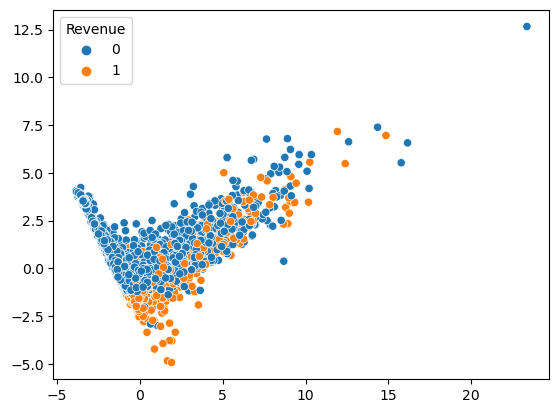

In [16]:
X0_range = (X_train_pca[:,0].min(), X_train_pca[:,0].max())
X1_range = (X_train_pca[:,1].min(), X_train_pca[:,1].max())

sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, marker='o')
#sns.scatterplot(X_test_pca[:,0], X_test_pca[:,1], hue=y_test, marker='^')


## 3.4 Clustering

Vogliamo fare un'analisi del dataset attraverso il clustering, per poi confrontare l'algoritmo di clustering migliore con il miglior algoritmo di classificazione. Decidiamo di costruire sia hierarchical clustering (bottom-up) che partitioning clustering (k-means e DBSCAN).

Per valutare l'algoritmo di clustering migliore, ci basiamo su external indexes, in particolare porremo l'attenzione su purity e Jaccard similarity. Usiamo questo tipo di indici perchè vogliamo predire l'outcome della variabile binaria "Revenue" e quindi sarà importante valutare anche la coerenza tra cluster e classe.

## 3.5 Hierarchical clustering

### Bottom-up

In [17]:
model_agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity=element_distance_metric, linkage=linkage)
labels_agglomerative = model_agglomerative.fit_predict(X_train_pca)

In [18]:
metrics_agglomerative = get_cluster_metrics(labels_agglomerative,y_train,'Agglomerative')
metrics_agglomerative

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
Agglomerative,0.749027,0.828189,0.171811,0.994382,0.005618,0.88664,0.11336,0.99653,0.00347,0.828189,0.994382,0.844183,0.00215


## 3.6 Partitioning clustering

### K-means

In [21]:
model_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)             
labels_kmeans = model_kmeans.fit_predict(X_train_pca)

In [22]:
metrics_kmeans = get_cluster_metrics(labels_kmeans,y_train,'K-means')
metrics_kmeans

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
K-means,0.77952,0.866548,0.133452,0.716667,0.283333,0.873319,0.126681,0.728661,0.271339,0.866548,0.716667,0.844183,0.160905


### DBSCAN

In [24]:
model_DBSCAN = DBSCAN(eps=4, min_samples=3)
labels_DBSCAN = model_DBSCAN.fit_predict(X_train_pca)

In [26]:
metrics_DBSCAN = get_cluster_metrics(labels_DBSCAN[labels_DBSCAN!=-1],y_train[labels_DBSCAN!=-1],'DBSCAN')
metrics_DBSCAN

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
DBSCAN,0.844285,0.84456,0.15544,1.0,0.0,0.999615,0.000385,1.0,0.0,0.84456,1.0,0.844611,0.0


Mettere elbow

## 3.7 Comparison between algorithms

In [27]:
metrics_df = pd.DataFrame()
metrics_df = pd.concat([metrics_agglomerative,metrics_kmeans,metrics_DBSCAN],axis=0)
metrics_df

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
Agglomerative,0.749027,0.828189,0.171811,0.994382,0.005618,0.886640,0.113360,0.996530,0.003470,0.828189,0.994382,0.844183,0.002150
K-means,0.779520,0.866548,0.133452,0.716667,0.283333,0.873319,0.126681,0.728661,0.271339,0.866548,0.716667,0.844183,0.160905
DBSCAN,0.844285,0.844560,0.155440,1.000000,0.000000,0.999615,0.000385,1.000000,0.000000,0.844560,1.000000,0.844611,0.000000


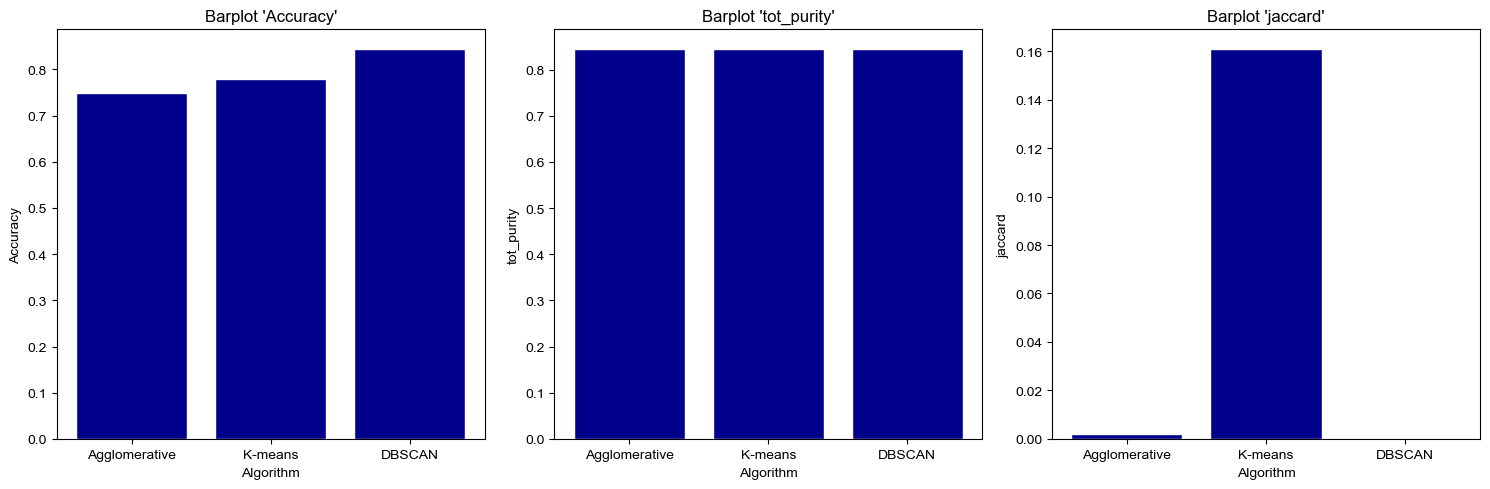

In [28]:
columns = ['Accuracy', 'tot_purity', 'jaccard']

num_cols = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

sns.set_style('whitegrid')
palette = 'Set2'

for i, col in enumerate(columns):
    values = metrics_df.loc[:,col]
    axes[i].bar(metrics_df.index, values, color="darkblue")
    axes[i].set_title(f"Barplot '{col}'")
    axes[i].set_xlabel('Algorithm')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show();
